In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [39]:
cats_data = pd.read_csv('cats_dataset.csv')

In [40]:
cats_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Breed        1000 non-null   object
 1   Age (Years)  1000 non-null   int64 
 2   Weight (kg)  1000 non-null   int64 
 3   Color        1000 non-null   object
 4   Gender       1000 non-null   object
dtypes: int64(2), object(3)
memory usage: 39.2+ KB


In [41]:
cats_data.head()

,Breed,Age (Years),Weight (kg),Color,Gender
0,Russian Blue,19,7,Tortoiseshell,Female
1,Norwegian Forest,19,9,Tortoiseshell,Female
2,Chartreux,3,3,Brown,Female
3,Persian,13,6,Sable,Female
4,Ragdoll,10,8,Tabby,Male


In [42]:
cats_data.describe(include='all')

,Breed,Age (Years),Weight (kg),Color,Gender
count,1000,1000.000000,1000.00000,1000,1000
unique,30,NaN,NaN,15,2
top,Ragdoll,NaN,NaN,Tricolor,Male
freq,51,NaN,NaN,73,505
mean,NaN,10.210000,5.55000,NaN,NaN
std,NaN,5.535751,2.22676,NaN,NaN
min,NaN,1.000000,2.00000,NaN,NaN
25%,NaN,5.000000,4.00000,NaN,NaN
50%,NaN,10.000000,6.00000,NaN,NaN
75%,NaN,15.000000,7.00000,NaN,NaN


In [43]:
cats_data.describe()

,Age (Years),Weight (kg)
count,1000.000000,1000.00000
mean,10.210000,5.55000
std,5.535751,2.22676
min,1.000000,2.00000
25%,5.000000,4.00000
50%,10.000000,6.00000
75%,15.000000,7.00000
max,19.000000,9.00000


In [44]:
print('Check for missing values in the dataset')
cats_data.isnull().sum()

Check for missing values in the dataset


Breed          0
Age (Years)    0
Weight (kg)    0
Color          0
Gender         0
dtype: int64

In [45]:
print('Correlation Matrix')
Correlation = cats_data[['Age (Years)', 'Weight (kg)']].corr()
Correlation

Correlation Matrix


,Age (Years),Weight (kg)
Age (Years),1.000000,-0.013602
Weight (kg),-0.013602,1.000000


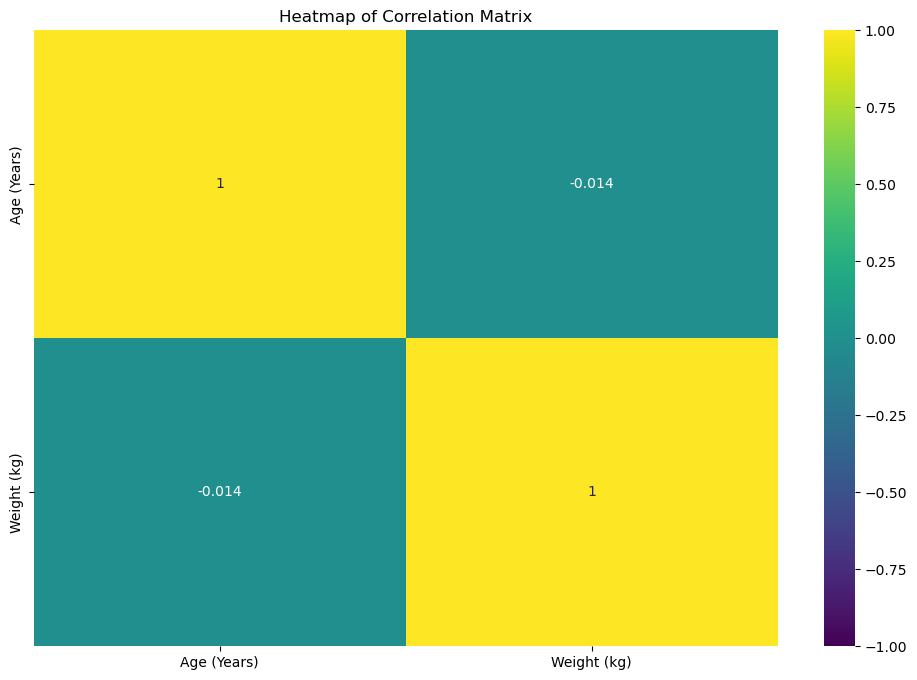

In [46]:
# Plot the Heatmap of Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(Correlation, annot=True, cmap='viridis', vmin=-1, vmax=1, center=0)
plt.title('Heatmap of Correlation Matrix')
plt.show()


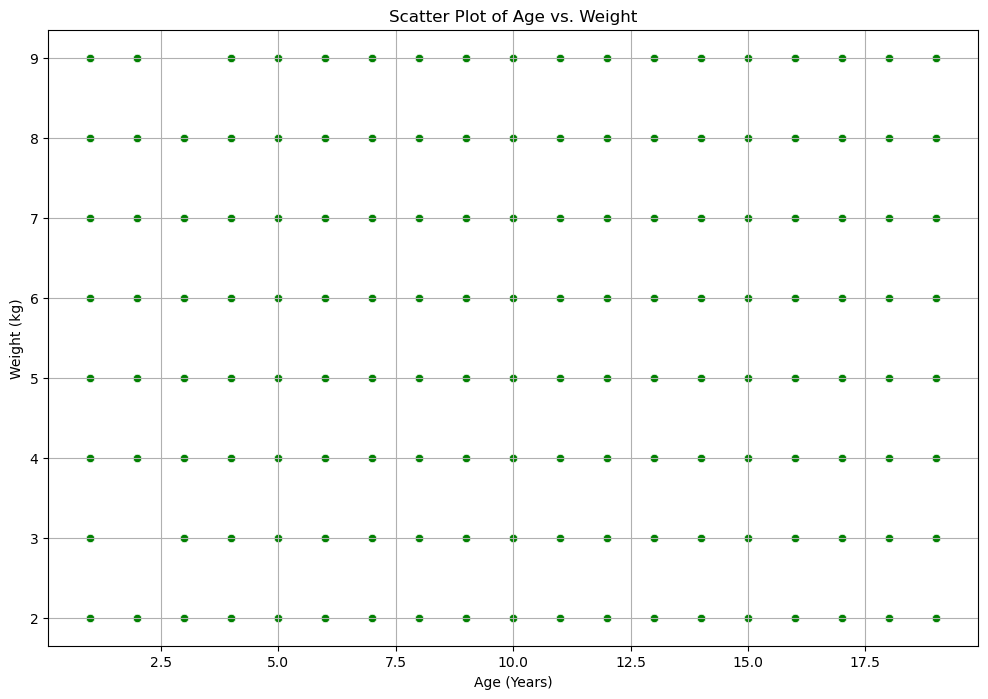

In [47]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age (Years)', y='Weight (kg)', data=cats_data, color='green')
plt.title('Scatter Plot of Age vs. Weight')
plt.grid()
plt.show()

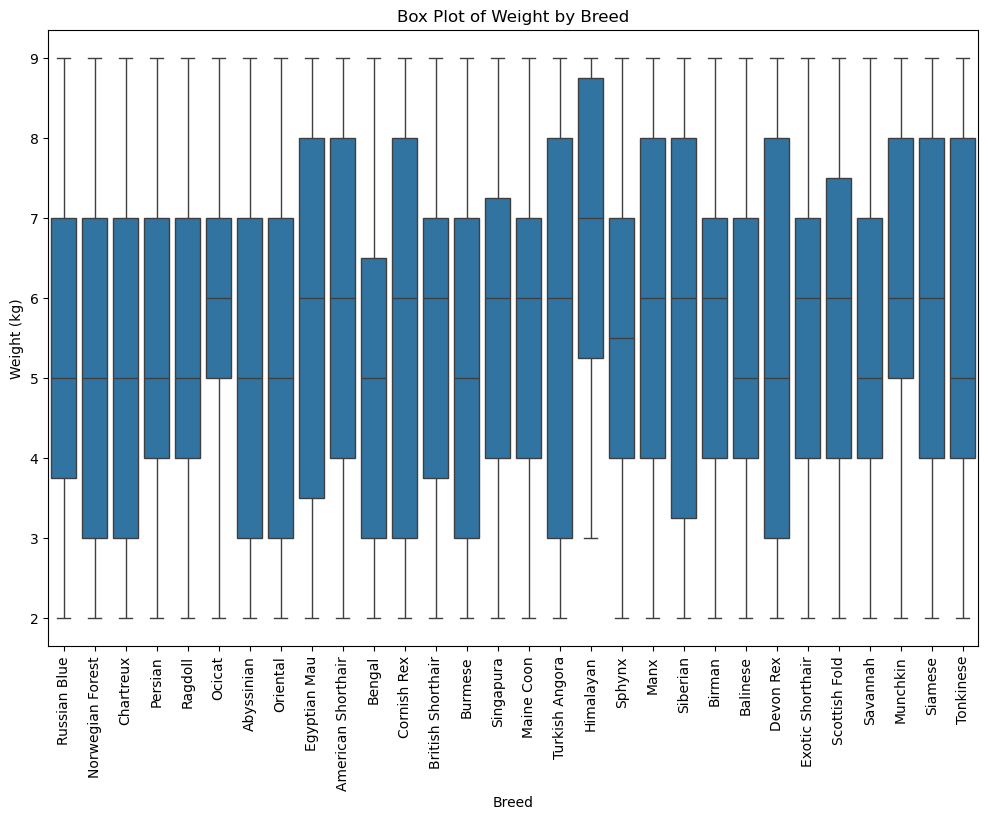

In [48]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Breed', y='Weight (kg)', data=cats_data)
plt.title('Box Plot of Weight by Breed')
plt.xticks(rotation=90)
plt.show()

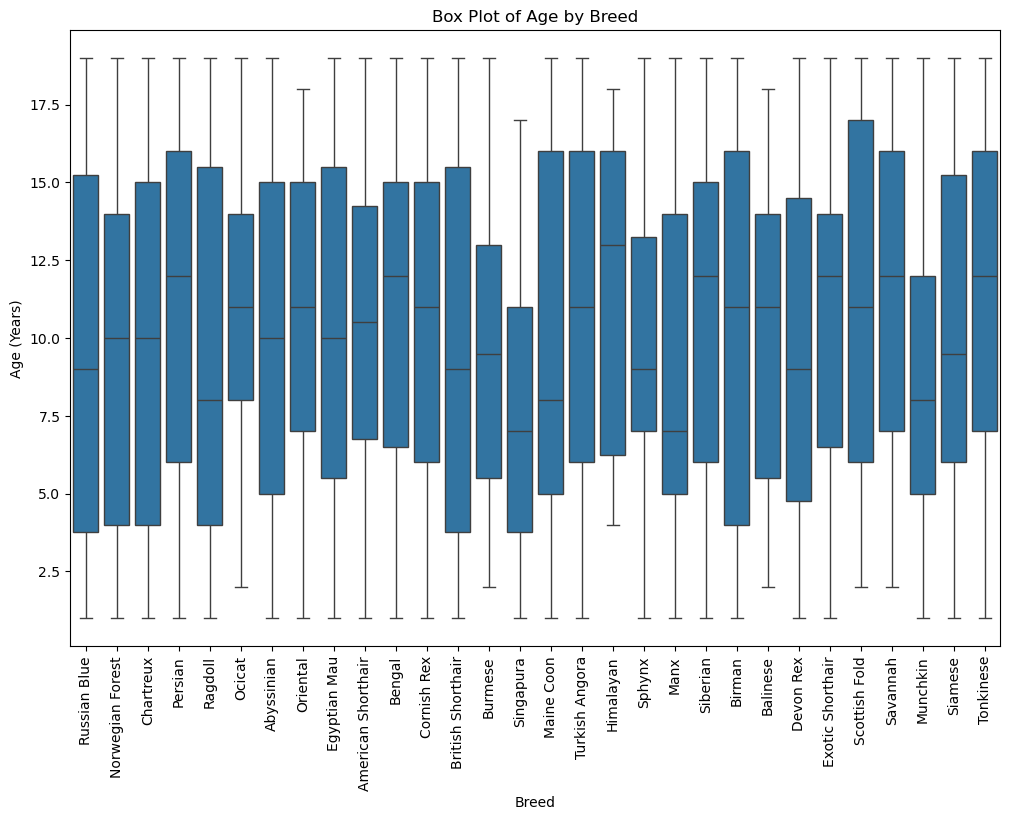

In [49]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Breed', y='Age (Years)', data=cats_data)
plt.title('Box Plot of Age by Breed')
plt.xticks(rotation=90)
plt.show()

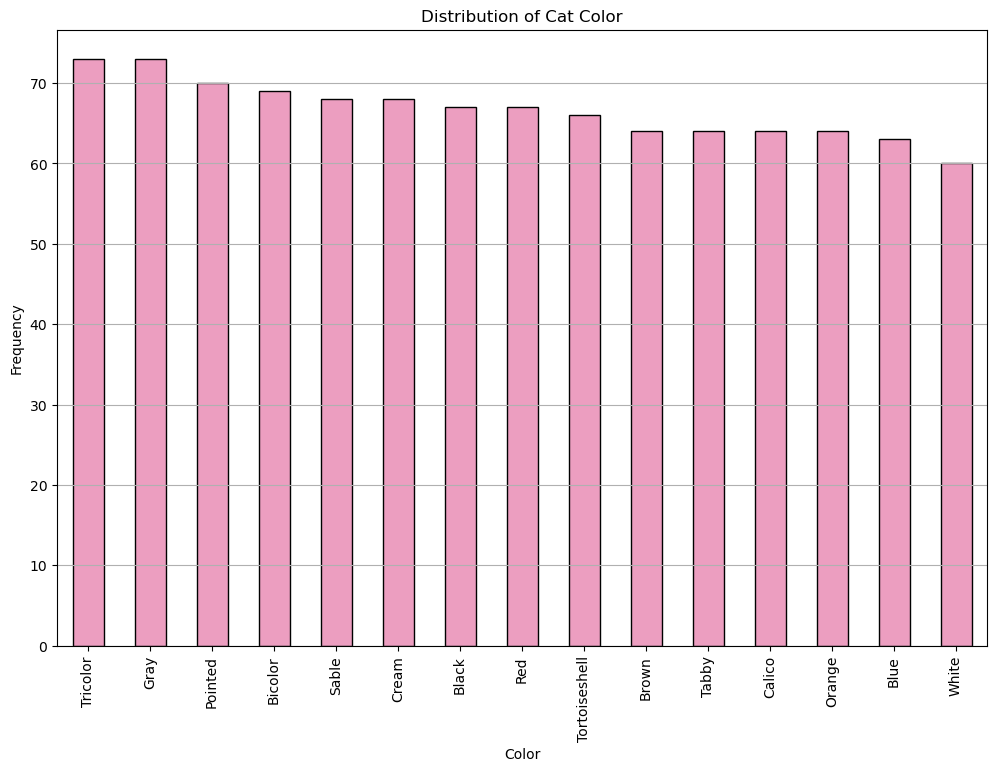

In [50]:
# Plot the distribution of color
plt.figure(figsize=(12, 8))
cats_data['Color'].value_counts().plot(kind='bar', edgecolor='black', color='#EC9EC0')
plt.title('Distribution of Cat Color')
plt.xlabel('Color')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

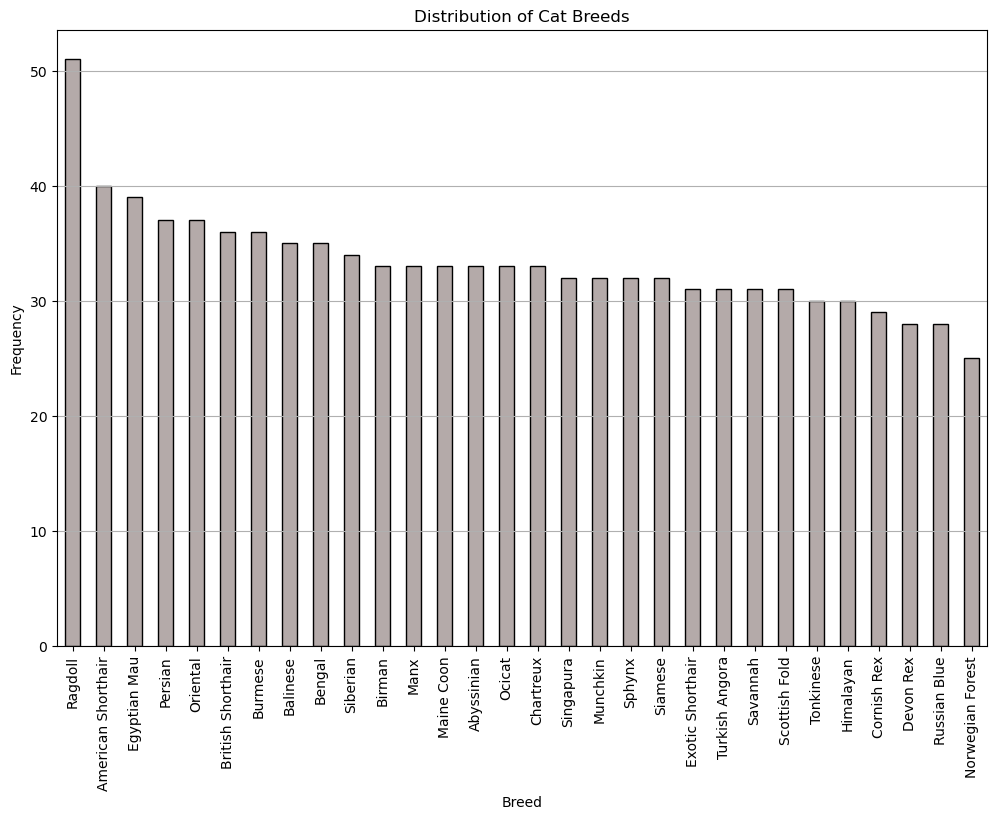

In [51]:
# Plot the distribution of breeds
plt.figure(figsize=(12, 8))
cats_data['Breed'].value_counts().plot(kind='bar', edgecolor='black', color='#B4AAA9')
plt.title('Distribution of Cat Breeds')
plt.xlabel('Breed')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

In [52]:
cats_data.groupby('Breed')[['Age (Years)', 'Weight (kg)']].mean().reset_index()

,Breed,Age (Years),Weight (kg)
0,Abyssinian,10.212121,4.939394
1,American Shorthair,10.300000,5.975000
2,Balinese,9.971429,5.485714
3,Bengal,11.371429,5.000000
4,Birman,10.121212,5.696970
5,British Shorthair,9.666667,5.388889
6,Burmese,9.638889,5.083333
7,Chartreux,9.969697,5.000000
8,Cornish Rex,10.344828,5.586207
9,Devon Rex,9.714286,5.285714


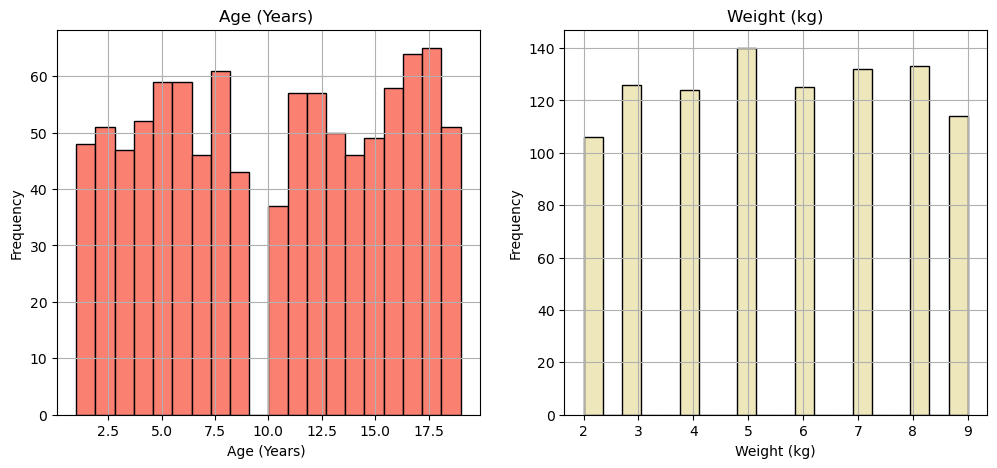

In [53]:
fig,ax=plt.subplots(1,2, figsize=(12,5))

cats_data['Age (Years)'].plot(kind='hist', ax=ax[0], bins=20, edgecolor='black', color='salmon')
ax[0].set_title('Age (Years) ')
ax[0].set_xlabel('Age (Years) ')
ax[0].set_ylabel('Frequency')
ax[0].grid(True)

# Plot histogram for survivors
cats_data['Weight (kg)'].plot(kind='hist', ax=ax[1], bins=20, edgecolor='black', color='#EFE7BC')
ax[1].set_title('Weight (kg)')
ax[1].set_xlabel('Weight (kg)')
ax[1].set_ylabel('Frequency')
ax[1].grid(True)

plt.show()


In [54]:
cats_data.groupby(['Gender']).size().reset_index(name='Count')

,Gender,Count
0,Female,495
1,Male,505


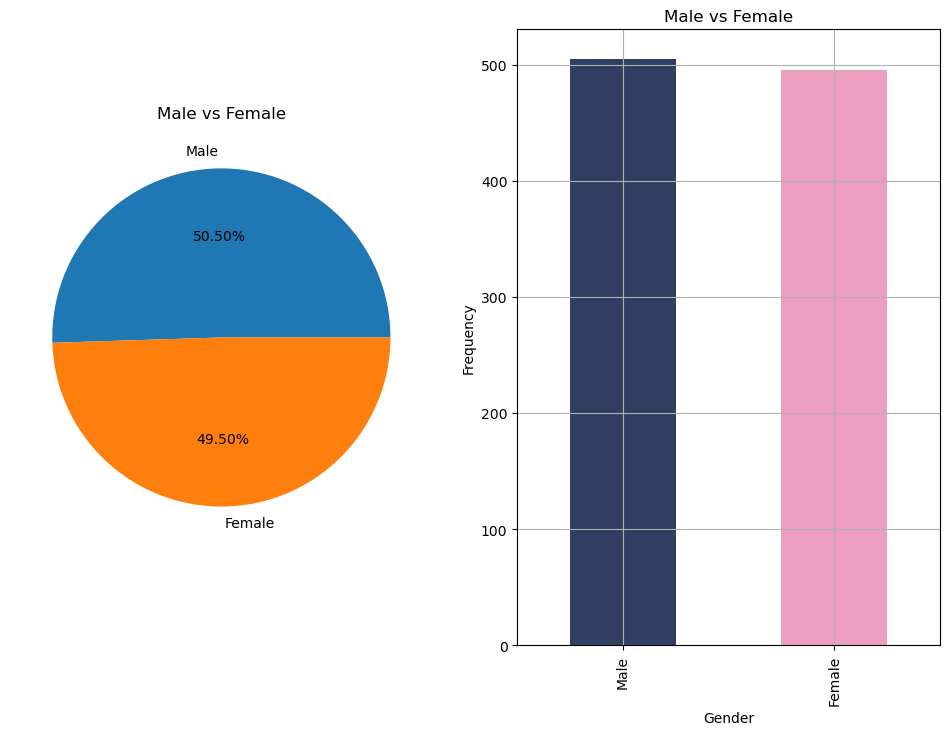

In [55]:
# plt.figure(figsize=(5, 5))
fig,ax=plt.subplots(1,2, figsize=(12,8))
colors = ['#313E61', '#EC9EC0']

cats_data['Gender'].value_counts().plot(kind='pie', ax=ax[0], autopct ='%.2f%%', color=colors)
ax[0].set_title('Male vs Female')
ax[0].set_ylabel('')

cats_data['Gender'].value_counts().plot(kind='bar', ax=ax[1], color=colors)
ax[1].set_title('Male vs Female')
ax[1].set_xlabel('Gender')
ax[1].set_ylabel('Frequency')
ax[1].grid(True)

plt.show()
